Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "alexandra-i"

---

# Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. 

Получаемая таким образом квадратурная схема *точно* инегрирует $f(x)$ если это полином степени $m\le2n-1$, где $n$ - степень полинома, корни которого используются в качестве узлов.

## Двухточечная квадратура Гаусса

Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале $[a, b]$. Заметим, что для этого достаточно построить _двухточечную_ квадратуру.

    hint:Легко найти точки и веса для отрезка [-1,1], после чего можно сделать аффинное преобразование..

Напишите функцию, которая возвращает веса, $w_1$ и $w_2$, и узлы, $x_1$ и $x_2$, двухточечной квадратурной формулы Гаусса с весовой функцией $w(x) = 1$, т.е., интегралы вида

$$
\int_a^b\! f(x)\, dx \approx w_1 f(x_1) + w_2 f(x_2)
$$

In [11]:
from math import sqrt 
def gauss_2(a, b):
    r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
    """
    w1=w2=(b-a)/2
    t1, t2 = sqrt(3)/3, -sqrt(3)/3 # корни полинома на отрезке [-1;1]
    x1, x2 = (b+a)/2+(b-a)/2*t1, (b+a)/2+(b-a)/2*t2
    return x1, x2, w1, w2

In [12]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

## Использование ортогональных полиномов

### Legendre

Теперь посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками".

In [13]:
F=lambda x: 7/4*x**4-8/3*x**3-3/2*x**2+3*x
a,b=-1,1
I=F(b)-F(a)
print('Точное значение интеграла: {}'.format(I))

Точное значение интеграла: 0.6666666666666674


2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в предыдущем дз). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [73]:
def midpoint_rule(func, a, b, eps, real):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    n=2
    h=(b-a)/n
    I_n=(b-a)*func((a+b)/2)
    I_n1=(func(a+0.5*h)+func(a+1.5*h))*h
    while abs(I_n1-I_n)>eps: 
        I_n=I_n1
        n=n*2
        h=(b-a)/n
        Ik_list=[]
        for n in range(1,n):
            x1=a + (n-1)*h
            x2=a + n*h
            x=(x1+x2)/2
            Ik=func(x)*h
            Ik_list.append(Ik)
        I_n1=sum(Ik_list)
    integral=I_n
    return integral, n

I, N = midpoint_rule(func=lambda x: 7*x**3-8*x**2-3*x+3, a=(-1), b=1, eps=1e-10)
print('Значение интеграла: {}'.format(I))
print('Число узлов: {}'.format(N))

KeyboardInterrupt: 

3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), с помощью Гауссовой квадратуры (используя корни полинома Лежандра степени от 1 до 6 в качестве узлов) (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [17]:
from scipy.special import roots_legendre


f=lambda x: 7*x**3-8*x**2-3*x+3
X,W=roots_legendre(6)
I=0
for i in range(6):
    I+=W[i]*f(X[i])
print('I = {}'.format(I))

I = 0.6666666666666695


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

In [70]:
# Метод гауссовых квадратур:
ep=1e-7

f=lambda x: 7*x**3-8*x**2-3*x+3
X0,W0=roots_legendre(2)
J0=sum([W[i]*f(X[i]) for i in range(2)])
X1,W1=roots_legendre(3)
J1=sum([W[i]*f(X[i]) for i in range(3)])
N=3
while abs(J1-J0)>=ep:
    J0=J1
    N+=1
    X,W=roots_legendre(N)
    J1=sum([W[i]*f(X[i]) for i in range(N)])

# Метод прямоугольников:
I, n=midpoint_rule(f, a=(-1), b=1, eps=ep)

print('Вычислим интеграл с точностью epsilon=1e-7.',
      '\nМетод гауссовых квадратур: N={}'.format(N),'\nМетод прямоугольников: N={}'.format(n))


Вычислим интеграл с точностью epsilon=1e-7. 
Метод гауссовых квадратур: N=5 
Метод прямоугольников: N=8063



Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [18]:
from scipy.special import roots_legendre


a,b=0,10
F=lambda x: 7/4*x**4-8/3*x**3-3/2*x**2+3*x
I=F(b)-F(a)
f=lambda x: 7*x**3-8*x**2-3*x+3
T,W=roots_legendre(6)
X=(b+a)/2+(b-a)/2*T
J=0
for i in range(6):
    J+=(b-a)/2*W[i]*f(X[i])
print('Точное значение интеграла: {}'.format(I))
print('Значение, полученное методом гауссовых квадратур: {}'.format(J))

Точное значение интеграла: 14713.333333333334
Значение, полученное методом гауссовых квадратур: 14713.333333333332


Сравните результат с точным значением интеграла.

Можно считать, что результат, полученный с использованием полиномов Лежандра, совпадает с точным.

### 

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит машинное $\epsilon$.


In [38]:
from math import pi, cos
import numpy as np

# Сделаем замену переменной интегрирования: t=x/2pi
# Пользуясь четностью подынтегральной функции, заменим пределы на [-1;1] и домножим интеграл на 1/2
f=lambda t: 1/(8*pi**2)*cos(2*pi*t)


# Будем искать веса и корни полинома Чебышева 1-го рода с помощью функции с семинара
def cheb_nodes(n):
    # NB: 1-based indexing, to match A&S!
    T = [(2.0*k-1.0) / (2.0*n) for k in range(1, n+1)]
    return [cos(pi*t) for t in T]

def cheb_weights(n):
    return pi / n

meps=np.finfo(float).eps
I0=sum([cheb_weights(2)*f(t/(2*pi)) for t in cheb_nodes(2)])
I1=sum([cheb_weights(3)*f(t/(2*pi)) for t in cheb_nodes(3)])
N=3
while abs(I1-I0)>=meps:
    I0=I1
    N+=1
    T=cheb_nodes(N)
    w=cheb_weights(N)
    I1=sum([w*f(t/(2*pi)) for t in T])
print('Степень полинома, начиная с которой точность вычисления превышает машинное эпсилон: {}'.format(N))

Степень полинома, начиная с которой точность вычисления превышает машинное эпсилон: 8


# Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Рассматривая данное уравнение на тех же узлах сетки $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.


Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \cos(x)  + \frac{1}{2\pi} \int_0^\pi \! \sin(x) \,t f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2\pi}$, ядро $K(x, t) = \sin(x)\cdot t$ и правая часть - $g(x) = \cos(x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006):

$$
f(x) = \cos(x)- \frac{2}{\pi}\sin(x)
$$

Для нахождения интеграла преобразуйте заменой переменных в интеграле область интегрирования в [0,1] воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Напишите функцию, возвращающую значение f(t_j) по схеме выше, которая в качестве параметра принимает величину $N$--число узлов в квадратуре, для нахождение решения СЛАУ можно использовать `scipy.linalg.solve`.

Постройте график истинного решения и набор (t_j, f_j) для раличных $N$, используя вашу функцию.

<IPython.core.display.Javascript object>


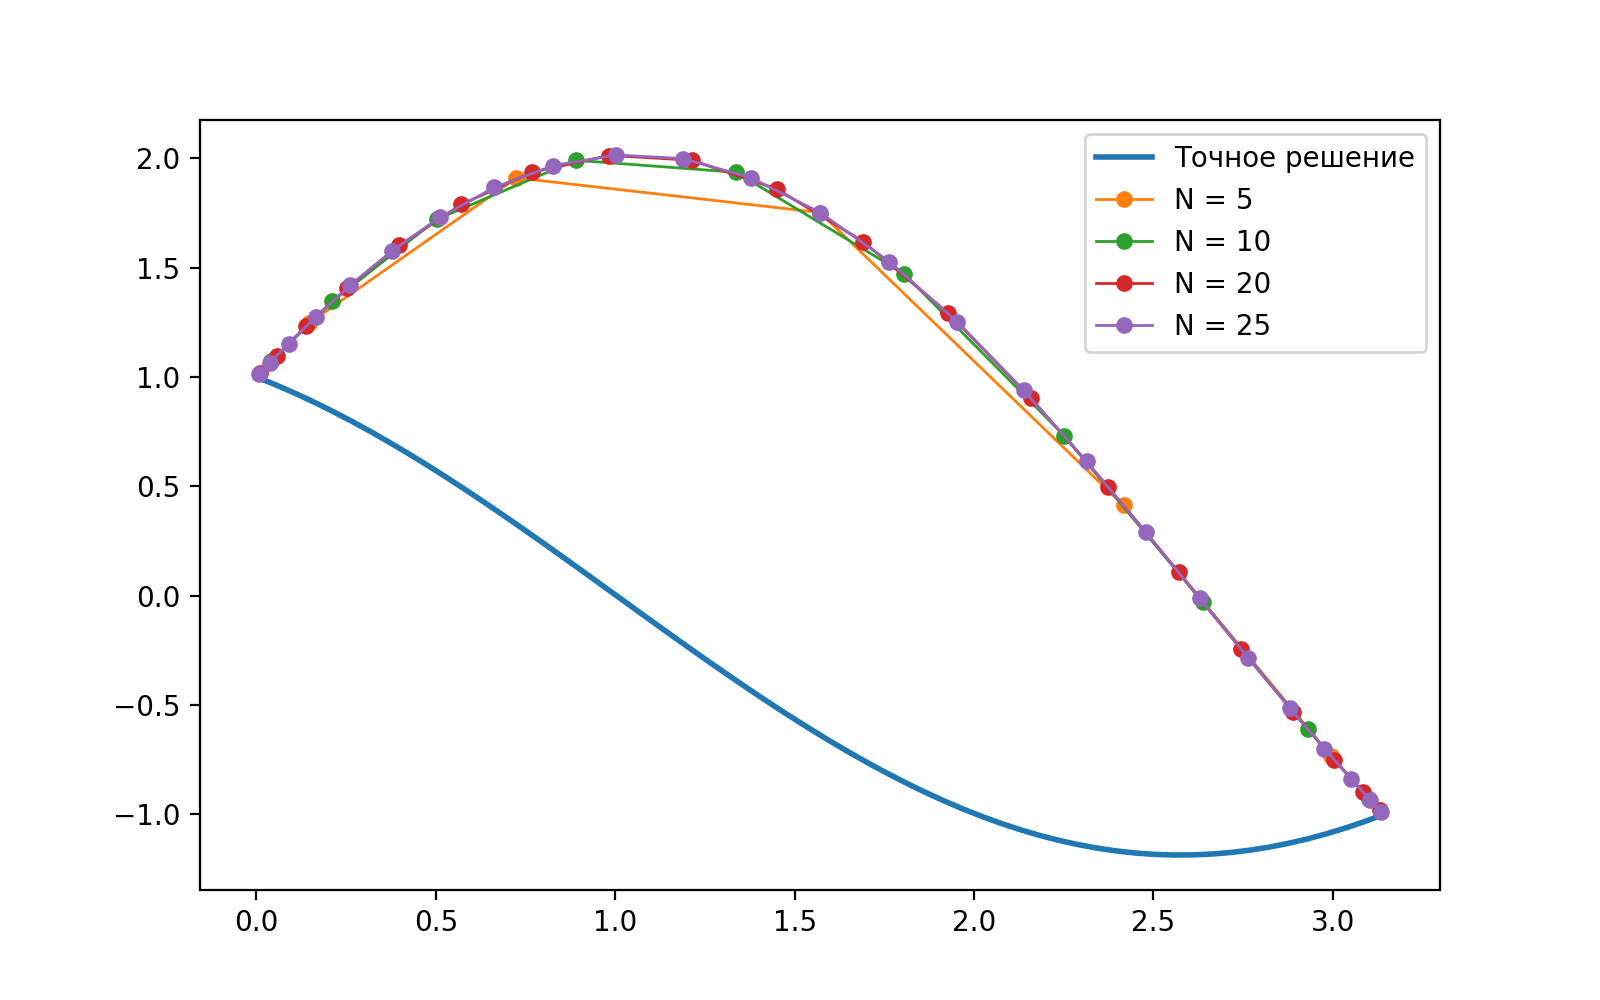

In [63]:
from math import pi
import numpy as np
import scipy.special as sc
from scipy.linalg import solve
%matplotlib notebook
import matplotlib.pyplot as plt

def K(x,t):
    return t*np.sin(x)

def g(x):
    return np.cos(x)

# Произведем замену переменной интегрирования: y=t/pi
lam=pi/2
def solve_fred(N):
    Y,W=sc.ps_roots(N)
    T=Y*pi
    M_0 = np.empty((N, N))
    for k in range(N):
        for j in range(N):
            M_0[k,j]=W[j]*K(T[k], T[j])
    M=np.eye(N)-lam*M_0
    g_vec=g(Y*pi)
    f_vec=solve(M,g_vec)
    return T, f_vec

z=np.linspace(0,pi,60)
plt.figure(figsize=(8,5))
plt.plot(z, np.cos(z)-2/pi*np.sin(z), '-', lw=2, label='Точное решение')
for N in [5, 10, 20, 25]:
    x, y = solve_fred(N)
    plt.plot(x, y, 'o-', lw=1, ms=5, label='N = %s' % N)
plt.legend(loc='best')

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их расположение.

Оказывается, интерполяционные методы (мы обсудим их на следующих занятиях) работают не очень хорошо, в сравнении с следующим подходом:

Используйте изначальный вид, чтобы вычислить значение функции на всём интервале:

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным решением для разлиных $N$.
(выбирайте наглядный масштаб)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Часть 3. Интеграл от осциллирующей функции - EXTRA points task

Рассмотрим определенный интеграл

$$
I = \int_0^\infty\! \frac{\sin(x) \cos{(\cos{(x)})}}{x}\,dx
$$

Вычислите значение данного интеграла с относительной точностью $10^{-6}$. Для упрощения задачи можете воспользоваться функционалом `scipy.integrate.quad`.

Заметим, что "из коробки" интеграл вычислить не удается, и нужно что-то придумать.

In [ ]:
from math import sin, cos

from scipy.integrate import quad
quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))

Напишите функцию, которая возвращает значение данного интеграла. Только само значение интеграла, без оценки погрешности.
(оборачиваем интеграл в функцию только для удобства автопроверки).

In [ ]:
from scipy.integrate import quad

def integ():
    """Return a single float, the computed value of the integral."""
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
from numpy.testing import assert_allclose

# this is a test cell, keep it intact
